# Projet Météo : Analyse prédictive météo

Importer les données : https://www.data.gouv.fr/fr/datasets/r/c1265c02-3a8e-4a28-961e-26b2fd704fe8

In [1]:
import pandas as pd

In [36]:
df_rr_t_vent = pd.read_csv('data/data_source.csv', sep=';')
df_rr_t_vent.head()

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJ,RR,QRR,TN,QTN,...,DXI2,QDXI2,HXI2,QHXI2,FXI3S,QFXI3S,DXI3S,QDXI3S,HXI3S,QHXI3S
0,1010001,ANGLEFORT,45.9,5.766667,280,19500101,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1010001,ANGLEFORT,45.9,5.766667,280,19500102,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1010001,ANGLEFORT,45.9,5.766667,280,19500103,13.8,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1010001,ANGLEFORT,45.9,5.766667,280,19500104,5.4,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1010001,ANGLEFORT,45.9,5.766667,280,19500105,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Convertir la colonne en format date et ne selectionner que les dates superieur à 2000.

In [3]:
df_rr_t_vent.loc[:, 'AAAAMMJJ'] = pd.to_datetime(df_rr_t_vent['AAAAMMJJ'], format='%Y%m%d')


In [4]:
df_filtered = df_rr_t_vent[df_rr_t_vent['AAAAMMJJ'] > pd.Timestamp('1999-12-31')]

print(df_filtered)


        NUM_POSTE        NOM_USUEL        LAT       LON  ALTI   AAAAMMJJ  \
17131     1014002           ARBENT  46.278167  5.669000   534 2004-03-17   
17132     1014002           ARBENT  46.278167  5.669000   534 2004-03-18   
17133     1014002           ARBENT  46.278167  5.669000   534 2004-03-19   
17134     1014002           ARBENT  46.278167  5.669000   534 2004-03-20   
17135     1014002           ARBENT  46.278167  5.669000   534 2004-03-21   
...           ...              ...        ...       ...   ...        ...   
940508    1453001  VIRIEU-LE-PETIT  45.906833  5.718167   603 2018-03-27   
940509    1453001  VIRIEU-LE-PETIT  45.906833  5.718167   603 2018-03-28   
940510    1453001  VIRIEU-LE-PETIT  45.906833  5.718167   603 2018-03-29   
940511    1453001  VIRIEU-LE-PETIT  45.906833  5.718167   603 2018-03-30   
940512    1453001  VIRIEU-LE-PETIT  45.906833  5.718167   603 2018-03-31   

          RR  QRR   TN  QTN  ...  DXI2  QDXI2  HXI2  QHXI2  FXI3S  QFXI3S  \
17131    0

Supprime les colonnes qui contiennent plus de 70% de données NaN

In [5]:
nombre_de_nan_par_colonne = df_filtered.isna().sum()
print(nombre_de_nan_par_colonne)


NUM_POSTE         0
NOM_USUEL         0
LAT               0
LON               0
ALTI              0
AAAAMMJJ          0
RR             3411
QRR            3319
TN           153293
QTN          153278
HTN          253591
QHTN         253515
TX           153056
QTX          153038
HTX          253585
QHTX         253507
TM           253435
QTM          253404
TNTXM        153369
QTNTXM       153351
TAMPLI       153369
QTAMPLI      153351
TNSOL        326006
QTNSOL       326000
TN50         333855
QTN50        333855
DG           255587
QDG          255562
FFM          291759
QFFM         291671
FF2M         339477
QFF2M        339475
FXY          292812
QFXY         292709
DXY          293268
QDXY         293165
HXY          292825
QHXY         292722
FXI          292174
QFXI         291678
DXI          292253
QDXI         291757
HXI          292320
QHXI         291741
FXI2         339109
QFXI2        339106
DXI2         340911
QDXI2        340908
HXI2         339510
QHXI2        339507


In [6]:
import pandas as pd



# Calculer le seuil pour le nombre minimum de valeurs non-NaN
seuil = len(df_filtered) * 0.3  # 30% de valeurs non-NaN

# Faire une copie du DataFrame original pour conserver la colonne 'TM'
df_temp = df_filtered[['TM']].copy()

# Supprimer les colonnes avec plus de 70% de NaN, à l'exception de la colonne 'TM'
cols_to_drop = df_filtered.columns[df_filtered.isnull().mean() > 0.7]
cols_to_drop = cols_to_drop[cols_to_drop != 'TM']  # Exclure la colonne 'TM' de la suppression
df_filtered.drop(columns=cols_to_drop, inplace=True)


if 'TM' not in df_filtered.columns:
    df_filtered = pd.concat([df_filtered, df_temp], axis=1)

# Afficher le DataFrame
print(df_filtered)


        NUM_POSTE        NOM_USUEL        LAT       LON  ALTI   AAAAMMJJ  \
17131     1014002           ARBENT  46.278167  5.669000   534 2004-03-17   
17132     1014002           ARBENT  46.278167  5.669000   534 2004-03-18   
17133     1014002           ARBENT  46.278167  5.669000   534 2004-03-19   
17134     1014002           ARBENT  46.278167  5.669000   534 2004-03-20   
17135     1014002           ARBENT  46.278167  5.669000   534 2004-03-21   
...           ...              ...        ...       ...   ...        ...   
940508    1453001  VIRIEU-LE-PETIT  45.906833  5.718167   603 2018-03-27   
940509    1453001  VIRIEU-LE-PETIT  45.906833  5.718167   603 2018-03-28   
940510    1453001  VIRIEU-LE-PETIT  45.906833  5.718167   603 2018-03-29   
940511    1453001  VIRIEU-LE-PETIT  45.906833  5.718167   603 2018-03-30   
940512    1453001  VIRIEU-LE-PETIT  45.906833  5.718167   603 2018-03-31   

          RR  QRR   TN  QTN    TX  QTX    TM  TNTXM  QTNTXM  TAMPLI  QTAMPLI  
17131   

C:\Users\Isian\AppData\Local\Temp\ipykernel_22020\1919960992.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(columns=cols_to_drop, inplace=True)


In [7]:
mean_values = df_filtered.mean()

# Remplacement des valeurs NaN par la moyenne de leur colonne respective
df_filled = df_filtered.fillna(mean_values)

print(df_filled)

C:\Users\Isian\AppData\Local\Temp\ipykernel_22020\3033723332.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean_values = df_filtered.mean()


        NUM_POSTE        NOM_USUEL        LAT       LON  ALTI   AAAAMMJJ  \
17131     1014002           ARBENT  46.278167  5.669000   534 2004-03-17   
17132     1014002           ARBENT  46.278167  5.669000   534 2004-03-18   
17133     1014002           ARBENT  46.278167  5.669000   534 2004-03-19   
17134     1014002           ARBENT  46.278167  5.669000   534 2004-03-20   
17135     1014002           ARBENT  46.278167  5.669000   534 2004-03-21   
...           ...              ...        ...       ...   ...        ...   
940508    1453001  VIRIEU-LE-PETIT  45.906833  5.718167   603 2018-03-27   
940509    1453001  VIRIEU-LE-PETIT  45.906833  5.718167   603 2018-03-28   
940510    1453001  VIRIEU-LE-PETIT  45.906833  5.718167   603 2018-03-29   
940511    1453001  VIRIEU-LE-PETIT  45.906833  5.718167   603 2018-03-30   
940512    1453001  VIRIEU-LE-PETIT  45.906833  5.718167   603 2018-03-31   

          RR  QRR        TN       QTN    TX  QTX         TM      TNTXM  \
17131    0.0 

C:\Users\Isian\AppData\Local\Temp\ipykernel_22020\3033723332.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = df_filtered.mean()


Analyses statistiques

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurer seaborn pour améliorer le rendu visuel
sns.set()


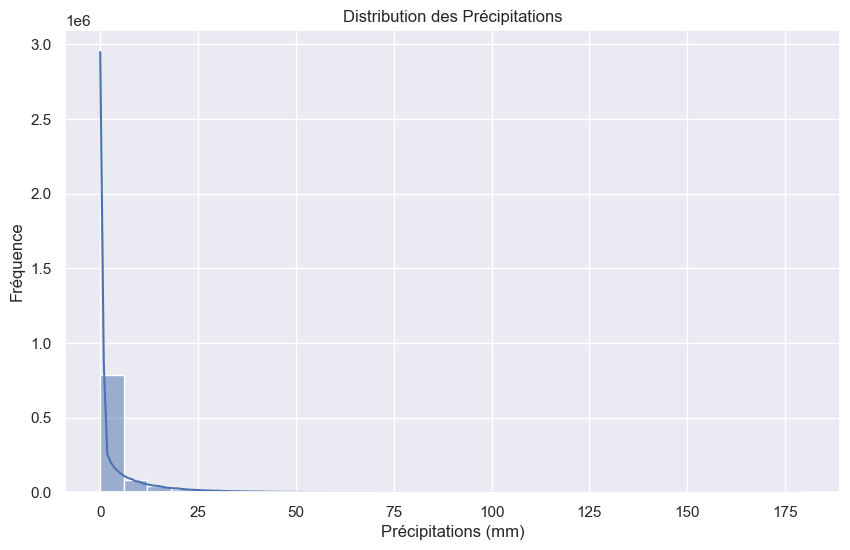

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df_rr_t_vent['RR'], bins=30, kde=True)
plt.title('Distribution des Précipitations')
plt.xlabel('Précipitations (mm)')
plt.ylabel('Fréquence')
plt.show()

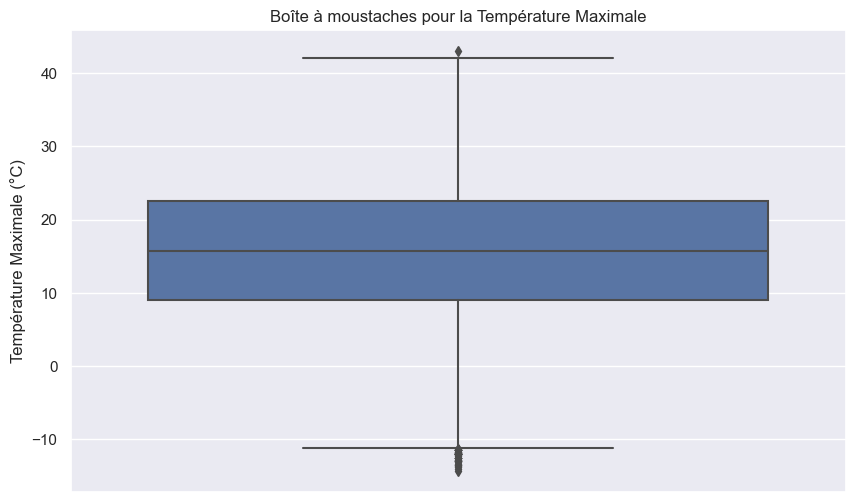

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_rr_t_vent['TX'])
plt.title('Boîte à moustaches pour la Température Maximale')
plt.ylabel('Température Maximale (°C)')
plt.show()

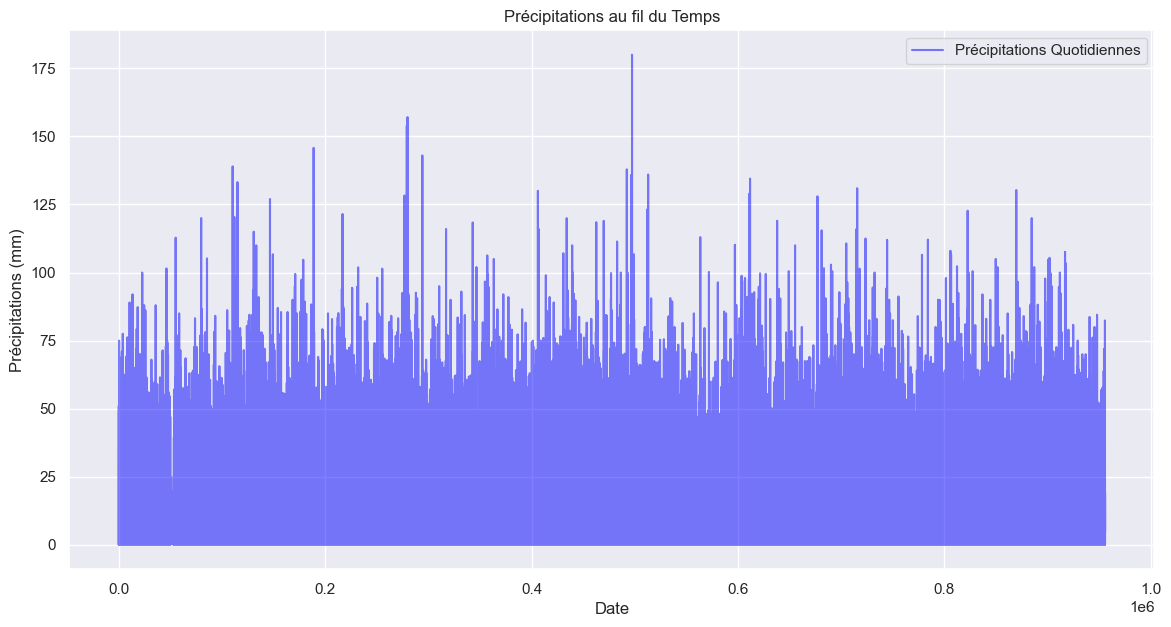

In [11]:
plt.figure(figsize=(14, 7))
plt.plot(df_rr_t_vent.index, df_rr_t_vent['RR'], label='Précipitations Quotidiennes', color='blue', alpha=0.5)
plt.title('Précipitations au fil du Temps')
plt.xlabel('Date')
plt.ylabel('Précipitations (mm)')
plt.legend()
plt.show()


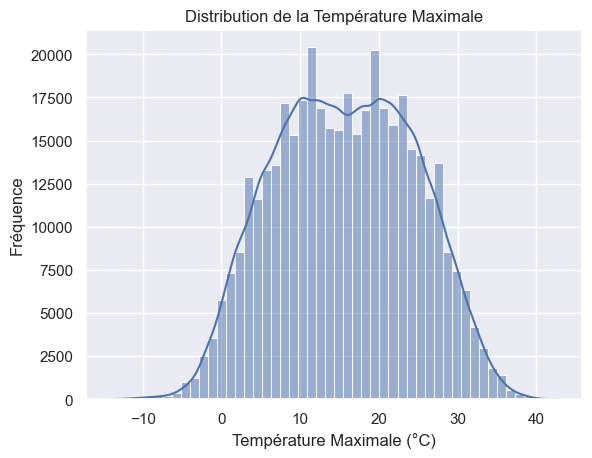

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution de la température maximale
sns.histplot(df_rr_t_vent['TX'], bins=50, kde=True)
plt.title('Distribution de la Température Maximale')
plt.xlabel('Température Maximale (°C)')
plt.ylabel('Fréquence')
plt.show()


Modèle de prédiction LSTM 

Epoch 1/20
7701/7701 [==============================] - 36s 4ms/step - loss: 0.0010 - val_loss: 7.0369e-04
Epoch 2/20
7701/7701 [==============================] - 33s 4ms/step - loss: 6.0237e-04 - val_loss: 5.6846e-04
Epoch 3/20
7701/7701 [==============================] - 33s 4ms/step - loss: 5.9655e-04 - val_loss: 5.7901e-04
Epoch 4/20
7701/7701 [==============================] - 35s 5ms/step - loss: 5.8963e-04 - val_loss: 5.8104e-04
Epoch 5/20
7701/7701 [==============================] - 35s 5ms/step - loss: 5.8906e-04 - val_loss: 6.1785e-04
Epoch 6/20
7701/7701 [==============================] - 34s 4ms/step - loss: 5.8523e-04 - val_loss: 5.6876e-04
Epoch 7/20
7701/7701 [==============================] - 35s 5ms/step - loss: 5.8404e-04 - val_loss: 5.7247e-04
Epoch 8/20
7701/7701 [==============================] - 33s 4ms/step - loss: 5.8254e-04 - val_loss: 5.8468e-04
Epoch 9/20
7701/7701 [==============================] - 35s 5ms/step - loss: 5.8456e-04 - val_loss: 5.8237e-04
Epoch

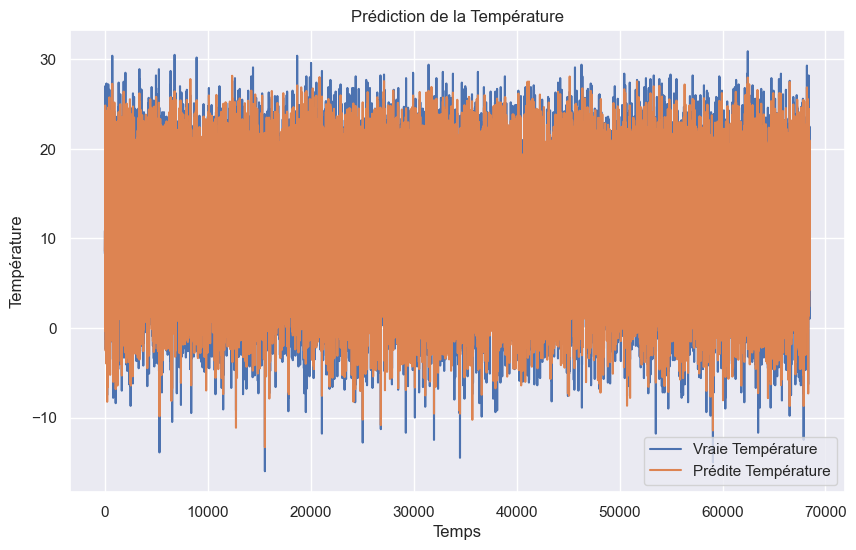

In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Chargement du DataFrame
# df_filled = pd.read_csv('path_to_your_cleaned_data.csv')  # Décommentez et ajustez le chemin
# Assurez-vous que df_filled est votre DataFrame déjà nettoyé et prêt à être utilisé

# Sélectionnez ici votre colonne cible, par exemple, 'TM' pour la température moyenne
data = df_filled[['TM']].values

# Normalisation des données
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Fonction pour créer des séquences
def create_sequences(data, sequence_length):
    xs, ys = [], []
    for i in range(len(data) - sequence_length - 1):
        x = data[i:(i + sequence_length)]
        y = data[i + sequence_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Création des séquences
sequence_length = 10
X, y = create_sequences(data_scaled, sequence_length)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Construction du modèle LSTM
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Entraînement du modèle
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

# Prédiction et dénormalisation des données
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test)

# Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='Vraie Température')
plt.plot(predictions, label='Prédite Température')
plt.title('Prédiction de la Température')
plt.xlabel('Temps')
plt.ylabel('Température')
plt.legend()
plt.show()


In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calcul de l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test_inv, predictions)
# Calcul de la racine de l'erreur quadratique moyenne (RMSE)
rmse = sqrt(mse)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


MSE: 1.2436779361739607
RMSE: 1.1152030918958038


La MSE signifie que, en moyenne, le carré des écarts entre les températures prédites et les température réelles est de 1,280. 

Un RMSE de 1.131 indique que, en moyenne, les prédictions du modèle s'écartent d'environ 1.131 unités de la valeur réelle. Cela signifie que les prédictions du modèle sont généralement à plus ou moins 1.131 degrés de la température réelle.

In [18]:
df_filled.to_csv('data/data_trained.csv', index=False)  
# np.savetxt("data/data_trained.csv", data, delimiter=";")

In [35]:
model.save('models/model.keras')

In [20]:
import keras

In [34]:
saved_model = keras.models.load_model('models/model.keras')

In [22]:
X_test

array([[[0.56653845],
        [0.56653845],
        [0.56653845],
        ...,
        [0.56653845],
        [0.56653845],
        [0.56653845]],

       [[0.52320675],
        [0.51054852],
        [0.51054852],
        ...,
        [0.55274262],
        [0.51054852],
        [0.5021097 ]],

       [[0.56653845],
        [0.56653845],
        [0.56653845],
        ...,
        [0.56653845],
        [0.56653845],
        [0.56653845]],

       ...,

       [[0.40084388],
        [0.42827004],
        [0.40084388],
        ...,
        [0.49367089],
        [0.47679325],
        [0.42827004]],

       [[0.56653845],
        [0.56653845],
        [0.56653845],
        ...,
        [0.56653845],
        [0.56653845],
        [0.56653845]],

       [[0.56653845],
        [0.56653845],
        [0.56653845],
        ...,
        [0.56653845],
        [0.56653845],
        [0.56653845]]])

In [31]:
prediction_request = pd.DataFrame(columns=["NUM_POSTE","LAT","LON","ALTI","QRR"], data=[["01010001",45.9,5.766667,280,1.0]])
prediction_request

,NUM_POSTE,LAT,LON,ALTI,QRR
0,01010001,45.9,5.766667,280,1.0


In [32]:
prediction_request = scaler.fit_transform(prediction_request)

In [33]:
predictions2 = model.predict(prediction_request)

InvalidArgumentError: Graph execution error:

transpose expects a vector of size 2. But input(1) is a vector of size 3
	 [[{{node transpose}}]]
	 [[sequential/lstm/PartitionedCall]] [Op:__inference_predict_function_540224]